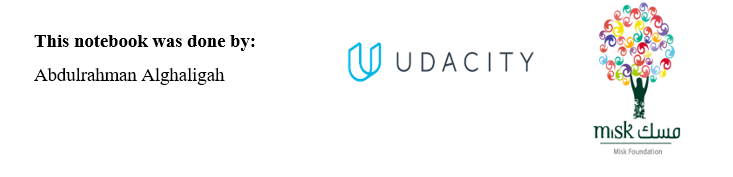

# Project: Wrangling and Analyze Data

In [1]:
#in the cell, I'll import the libraries that I will use in the project
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import matplotlib.pyplot as plt 
%matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df=pd.read_csv('twitter-archive-enhanced.csv') # reading the WeRateDogs Twitter archive dataset  
df.sample() #printing a sample from the dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1520,690728923253055490,NaN,NaN,2016-01-23 02:53:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vinscent. He was just questioned about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690728923...,8,10,Vinscent,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# creating a folder for image predictions if it's not already created 
folder_name='image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#downloading the image predictions file and write in a new file 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

response # checking if the request is accepted

<Response [200]>

In [5]:
df_img=pd.read_csv('image-predictions/image-predictions.tsv',sep='\t')# reading the image predictions dataset
df_img.head()# printing the first 5 rows in the dataset

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
consumer_key = '############'
consumer_secret = '############'
access_token = '############'
access_secret = '############'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
twitter_api_list=[] # cathing the tweets in this list
twitter_api_exp=[] # tweets that can't be found will be catched in this list


ids=list(df['tweet_id'])# taking all the tweet_ids and put it in a list
start=time.time()# starting time for before the loop
for t_id in ids:
    try:
        tweet = api.get_status(t_id, tweet_mode='extended',wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
        twitter_api_list.append(tweet._json)# add the tweet in the list
    except Exception as e:
        print('Error in the tweet with id: {}'.format(t_id))# printing the tweet_id if there is error on catching the tweet
        twitter_api_exp.append(tweet) #add the tweet in the exception list
end=time.time()# ending time after completing the loop

print('Completed after {} minutes'.format(int((end-start)/60)))
            


Error in the tweet with id: 888202515573088257
Error in the tweet with id: 873697596434513921
Error in the tweet with id: 872668790621863937
Error in the tweet with id: 872261713294495745
Error in the tweet with id: 869988702071779329
Error in the tweet with id: 866816280283807744
Error in the tweet with id: 861769973181624320
Error in the tweet with id: 856602993587888130
Error in the tweet with id: 856330835276025856
Error in the tweet with id: 851953902622658560
Error in the tweet with id: 845459076796616705
Error in the tweet with id: 844704788403113984
Error in the tweet with id: 842892208864923648
Error in the tweet with id: 837366284874571778
Error in the tweet with id: 837012587749474308
Error in the tweet with id: 829374341691346946
Error in the tweet with id: 827228250799742977
Error in the tweet with id: 812747805718642688
Error in the tweet with id: 802247111496568832
Error in the tweet with id: 779123168116150273
Error in the tweet with id: 775096608509886464
Error in the 

Rate limit reached. Sleeping for: 511


Error in the tweet with id: 754011816964026368
Error in the tweet with id: 680055455951884288


Rate limit reached. Sleeping for: 511


Completed after 34 minutes


In [8]:
# writing the tweet list into a text file
with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
    json.dump(twitter_api_list, outfile, ensure_ascii=False, sort_keys=True, indent=4)

In [9]:
df_twitter_api=pd.read_json('tweet_json.txt')# reading the dataset
df_twitter_api.head() # printing the first 5 rows in the dataset

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,retweet_count,retweeted,source,truncated,user,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweeted_status,quoted_status
0,NaN,NaN,2017-08-01 16:23:56+00:00,"[0, 85]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/Mg...,34512,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,7182,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2017-08-01 00:17:27+00:00,"[0, 138]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/0X...,29925,False,This is Tilly. She's just checking pup on you....,NaN,...,5392,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2017-07-31 00:18:03+00:00,"[0, 121]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/wU...,22521,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,3556,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2017-07-30 15:58:51+00:00,"[0, 79]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/tD...,37762,False,This is Darla. She commenced a snooze mid meal...,NaN,...,7405,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2017-07-29 16:00:24+00:00,"[0, 138]","{'hashtags': [{'indices': [129, 138], 'text': ...",{'media': [{'display_url': 'pic.twitter.com/At...,36043,False,This is Franklin. He would like you to stop ca...,NaN,...,7940,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN,NaN,NaN


In [10]:
df_twitter_api=df_twitter_api[['id','retweet_count','favorite_count']]
df_twitter_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,7182,34512
1,892177421306343426,5392,29925
2,891815181378084864,3556,22521
3,891689557279858688,7405,37762
4,891327558926688256,7940,36043


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### Firstly let's assess the datasets visually:

<b> 1- Assessing Enhanced Twitter Archive visually:

In [11]:
df 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
2219,668496999348633600,NaN,NaN,2015-11-22 18:31:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jo. Jo is a Swedish Queso. Tongue bigg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668496999...,8,10,Jo,None,None,None,None
1116,732585889486888962,NaN,NaN,2016-05-17 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When your teacher agreed on 10,000 RTs and no ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/732585889...,10,10,None,None,None,None,None
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,None,None,None
1741,679475951516934144,NaN,NaN,2015-12-23 01:37:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Evy. She doesn't want to be a Koala. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679475951...,9,10,Evy,None,None,None,None
808,771770456517009408,NaN,NaN,2016-09-02 18:03:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Davey. He'll have your daughter home b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,None,None,None
410,823322678127919110,NaN,NaN,2017-01-23 00:13:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He's got the fastest paws in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,None,None,None,None
1713,680473011644985345,NaN,NaN,2015-12-25 19:39:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hector. He thinks he's a hammer. Silly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680473011...,10,10,Hector,None,None,pupper,None


 <br>
 <b>2-Assessing  Image prediction visually:

In [13]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
df_img.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
86,667517642048163840,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,0.125176,True,standard_poodle,0.084571,True,cocker_spaniel,0.081347,True
1067,715733265223708672,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False
1947,862722525377298433,https://pbs.twimg.com/media/C_kBjuUUIAArs2-.jpg,1,basset,0.393330,True,beagle,0.242034,True,boxer,0.077692,True
1316,755110668769038337,https://pbs.twimg.com/ext_tw_video_thumb/75511...,1,Labrador_retriever,0.708974,True,golden_retriever,0.114314,True,Great_Pyrenees,0.065813,True
1138,729113531270991872,https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg,2,stone_wall,0.606188,False,prison,0.064831,False,bannister,0.048048,False
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
629,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,Pomeranian,0.615678,True,golden_retriever,0.126455,True,Chihuahua,0.087184,True


 <br>
 <b>3-Assessing the data from twitter API visually:

In [15]:
df_twitter_api

,id,retweet_count,favorite_count
0,892420643555336193,7182,34512
1,892177421306343426,5392,29925
2,891815181378084864,3556,22521
3,891689557279858688,7405,37762
4,891327558926688256,7940,36043
...,...,...,...
2323,666049248165822465,37,92
2324,666044226329800704,118,252
2325,666033412701032449,37,103
2326,666029285002620928,40,116


In [16]:
df_twitter_api.sample(10)

,id,retweet_count,favorite_count
1179,715758151270801409,1328,3507
2064,670782429121134593,690,1399
1551,687317306314240000,8598,19079
2194,668466899341221888,459,799
1760,677557565589463040,1055,2284
1773,676957860086095872,741,2083
1819,675820929667219457,219,973
627,793150605191548928,1634,5980
118,868880397819494401,12566,59201
454,816697700272001025,2093,9459


##### Secondly let's assess the datasets programmatically:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
df.query('name=="a" or name=="None" or name=="the" or name=="an"')[['tweet_id','name']]

,tweet_id,name
5,891087950875897856,None
7,890729181411237888,None
12,889665388333682689,None
24,887343217045368832,None
25,887101392804085760,None
...,...,...
2351,666049248165822465,None
2352,666044226329800704,a
2353,666033412701032449,a
2354,666029285002620928,a


In [20]:
df[df.retweeted_status_id.isnull()==False]# should we keep the retweeted tweets?

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [21]:
df.source.value_counts() # do we need the url in  the source column?

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [23]:
df.query('rating_denominator==0') # is it 960/0 ???

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [24]:
df.query('tweet_id==722974582966214656 ') # is it 4/20 ???

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


In [25]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df_twitter_api.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')


### Quality issues


##### Twitter Archive 

1. 815 missing dogs name recorded as 'a','the','an' and 'None' need to be converted to NAN (null).


2. Remove retweeted tweets from the dataset.


3.  Some  columns will not be used in the analysis and have too many missing values, it should be dropped. Columns like (in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id and expanded_urls ) will be dropped.


4. URL in source column should be removed.


5. After removing the URL in the source column, it has to be changed to category data type.


6. Erroneous datatypes (timestamp column)


7. tweet_id:[722974582966214656](https://twitter.com/dog_rates/status/722974582966214656) has wrong input it should be 13/10 not 4/20 and [835246439529840640](https://twitter.com/dog_rates/status/835246439529840640) should be 13/10 not 960/0



##### img prediction :

8. Erroneous datatypes (img_num should be category datatype)


9. Give the columns more descriptive names.

### Tidiness issues
1. Convert each breed of dogs to one column called breed.

2. Seprate timestamp column to two columns (date and time) .

3. Create a tidy master dataset that gathers all the datasets.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
archive_clean=df.copy()
img_clean=df_img.copy()
tw_api_clean=df_twitter_api.copy()

## Cleaning quality issues

###  Twitter Archive 


### Issue #1:

#### Define: Convert  all the 815 missing names to NAN by using "replace" function.

#### Code

In [30]:
#first we have to make a list contains all the missing wrong names

miss_names=['a','an','None','the']

In [31]:
# now we can make  a loop to replace each of the name to NAN

for name in miss_names:
    archive_clean=archive_clean.replace(name,np.NAN)

#### Test

In [32]:
archive_clean.query('name=="a" or name=="None" or name=="the" or name=="an"')[['tweet_id','name']]

,tweet_id,name


In [33]:
archive_clean.name.isnull().sum()

815

### Issue #2:

#### Define: Dropping all the retweeted tweets rows by using "isnull" function.

#### Code

In [34]:
archive_clean[archive_clean.retweeted_status_id.isnull()==False] # printing all the retweeted rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,NaN,NaN,NaN,NaN
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,NaN,NaN,NaN,NaN
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,NaN,NaN,NaN,NaN,NaN
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,NaN,NaN,NaN,NaN,NaN


In [35]:
archive_clean=archive_clean[archive_clean.retweeted_status_id.isnull()==True] # removing the retweeted tweets 

#### Test

In [36]:
archive_clean[archive_clean.retweeted_status_id.isnull()==False] # checking rows with retweeted id

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:

#### Define: Dropping unneded column  by using "drop" function.

#### Code

In [37]:
archive_clean=archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                  'retweeted_status_id', 'retweeted_status_user_id', 
                                  'retweeted_status_timestamp','expanded_urls'], axis=1)

#### Test

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                1426 non-null   object
 7   doggo               87 non-null     object
 8   floofer             10 non-null     object
 9   pupper              234 non-null    object
 10  puppo               25 non-null     object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #4:

#### Define: removing the url in source column using "loc" function.


#### Code

In [39]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
archive_clean.loc[archive_clean.source=='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
                  ,'source']='Twitter for iPhone'
archive_clean.loc[archive_clean.source=='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
                 ,'source']='Vine'
archive_clean.loc[archive_clean.source=='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
                 ,'source']='Twitter Web Client'
archive_clean.loc[archive_clean.source=='<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
                 ,'source']='TweetDeck'

In [41]:
archive_clean.source.value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #5:

#### Define: Convert source column datatype into category type by using "astype" function.

#### Code

In [42]:
archive_clean.source=archive_clean.source.astype('category')

#### Test

In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   category
 3   text                2175 non-null   object  
 4   rating_numerator    2175 non-null   int64   
 5   rating_denominator  2175 non-null   int64   
 6   name                1426 non-null   object  
 7   doggo               87 non-null     object  
 8   floofer             10 non-null     object  
 9   pupper              234 non-null    object  
 10  puppo               25 non-null     object  
dtypes: category(1), int64(3), object(7)
memory usage: 189.2+ KB


### Issue #6:

#### Define: Convert timestamp column datatype into datatime type by using "to_datetime" function

#### Code

In [44]:
archive_clean.timestamp=pd.to_datetime(archive_clean['timestamp'])

#### Test

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                1426 non-null   object             
 7   doggo               87 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              234 non-null    object             
 10  puppo               25 non-null     object             
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 189.2+ KB


### Issue #7:

#### Define: Correct the wrong ratings in two tweets  [835246439529840640](https://twitter.com/dog_rates/status/835246439529840640) and [722974582966214656](https://twitter.com/dog_rates/status/722974582966214656) ) by using 'at' function.

#### Code

In [46]:
archive_clean.query('tweet_id==835246439529840640 or tweet_id == 722974582966214656 ')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,4,20,NaN,NaN,NaN,NaN,NaN


In [47]:
archive_clean.at[313,'rating_numerator']=13 # changing the numerator of the tweet
archive_clean.at[313,'rating_denominator']=10 # changing the denominator of the tweet

In [48]:
archive_clean.at[1165,'rating_numerator']=13 # changing the numerator of the tweet
archive_clean.at[1165,'rating_denominator']=10 # changing the denominator of the tweet

#### Test

In [49]:
archive_clean.query('tweet_id==835246439529840640 or tweet_id == 722974582966214656 ')[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,13,10
1165,13,10


### img prediction


### Issue #8:

#### Define: Convert img_num column datatype into category type by using "astype" function.

#### Code

In [50]:
img_clean.img_num=img_clean.img_num.astype('category')

#### Test

In [51]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   int64   
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   category
 3   p1        2075 non-null   object  
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   object  
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   object  
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(1), float64(3), int64(1), object(4)
memory usage: 138.1+ KB


### Issue #9:


#### Define: Rename unclear columns to more descriptive names by using 'rename' functiion.

#### Code

In [52]:
img_clean=img_clean.rename(columns={'p1':'prediction_1','p2':'prediction_2','p3':'prediction_3',
                                   'p1_conf':'prediction1_confident','p2_conf':'prediction2_confident',
                                    'p3_conf':'prediction3_confident'})

#### Test

In [53]:
img_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'prediction1_confident', 'p1_dog', 'prediction_2',
       'prediction2_confident', 'p2_dog', 'prediction_3',
       'prediction3_confident', 'p3_dog'],
      dtype='object')

## Cleaning tidness issues

### Issue #1:

 #### Define:  Merging the doggo, floofer, pupper and puppo columns to one column using "extract function", then drop all the 4 columns.

#### Code

In [54]:
archive_clean['breed'] = archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
archive_clean=archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [55]:
archive_clean.breed.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: breed, dtype: int64

In [56]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'breed'],
      dtype='object')

### Issue #2:

#### Define: Converting column timestap to two columns, one for date and one for time, then droptime stamp column.

#### Code

In [57]:
archive_clean['date']=archive_clean['timestamp'].dt.date
archive_clean['time']=archive_clean['timestamp'].dt.time
archive_clean=archive_clean.drop('timestamp',axis=1)

#### Test

In [58]:
archive_clean.sample()

,tweet_id,source,text,rating_numerator,rating_denominator,name,breed,date,time
1312,707014260413456384,Twitter for iPhone,This is Ellie. She requests to be carried arou...,11,10,Ellie,NaN,2016-03-08,01:25:10


### Issue #3:

#### Define: Merge all the three dataset into one dataset using 'merge' function.

#### Code

In [59]:
df_clean=pd.merge(archive_clean,img_clean,on='tweet_id',how='inner')

In [60]:
df_clean=df_clean.merge(tw_api_clean,left_on='tweet_id',right_on='id')
df_clean=df_clean.drop(columns='id',axis=1)# drop the id column after merging the two datasets

#### Test

In [61]:
df_clean.duplicated(subset='tweet_id').sum() # check if there is a duplicated tweet after merging

0

In [62]:
df_clean.sample(10)

,tweet_id,source,text,rating_numerator,rating_denominator,name,breed,date,time,jpg_url,...,prediction1_confident,p1_dog,prediction_2,prediction2_confident,p2_dog,prediction_3,prediction3_confident,p3_dog,retweet_count,favorite_count
433,798925684722855936,Twitter for iPhone,This is Shadow. He's a firm believer that they...,11,10,Shadow,NaN,2016-11-16,16:28:21,https://pbs.twimg.com/media/CxZaqh_WQAA7lY3.jpg,...,0.539463,True,cairn,0.184897,True,Norfolk_terrier,0.163024,True,1391,7318
948,712097430750289920,Twitter for iPhone,I can't even comprehend how confused this dog ...,10,10,NaN,NaN,2016-03-22,02:03:52,https://pbs.twimg.com/media/CeHg1klW8AE4YOB.jpg,...,0.720481,True,whippet,0.048032,True,Chesapeake_Bay_retriever,0.045046,True,964,3566
1362,680801747103793152,Twitter for iPhone,Great picture here. Dog on the right panicked ...,10,10,NaN,NaN,2015-12-26,17:25:59,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,...,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True,763,2244
83,872620804844003328,Twitter for iPhone,This is Monkey. She's supporting owners everyw...,13,10,Monkey,NaN,2017-06-08,01:06:27,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,...,0.513191,True,Sussex_spaniel,0.159088,True,standard_poodle,0.149509,True,3140,18739
1753,670421925039075328,Twitter for iPhone,Meet Herb. 12/10 https://t.co/tLRyYvCci3,12,10,Herb,NaN,2015-11-28,02:00:17,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,...,0.275793,True,corn,0.073596,False,bolete,0.054905,False,571,1181
846,730196704625098752,Twitter for iPhone,This is Charles. He's camera shy. Tail longer ...,6,10,Charles,NaN,2016-05-11,00:43:55,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,...,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False,1746,4540
953,711743778164514816,Twitter for iPhone,Meet Roosevelt. He's calculating the best case...,11,10,Roosevelt,NaN,2016-03-21,02:38:34,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,...,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True,929,2693
941,713411074226274305,Twitter for iPhone,Here we see an extremely rare Bearded Floofmal...,11,10,NaN,NaN,2016-03-25,17:03:49,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,...,0.720337,True,Samoyed,0.129542,True,kuvasz,0.122451,True,1219,4189
519,783085703974514689,Twitter for iPhone,This is Earl. He can't catch. Did his best tho...,11,10,Earl,NaN,2016-10-03,23:25:55,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,...,0.240602,True,Airedale,0.164088,True,boxer,0.134506,True,2083,7889
570,773670353721753600,Twitter for iPhone,This is Shakespeare. He appears to be maximum ...,10,10,Shakespeare,NaN,2016-09-07,23:52:41,https://pbs.twimg.com/media/CryhFC0XEAA9wp_.jpg,...,0.969311,True,Maltese_dog,0.013243,True,soft-coated_wheaten_terrier,0.004857,True,1255,5165


In [63]:
df_clean.shape

(1986, 22)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Question1: Which of the dog breeds gets more retweets?

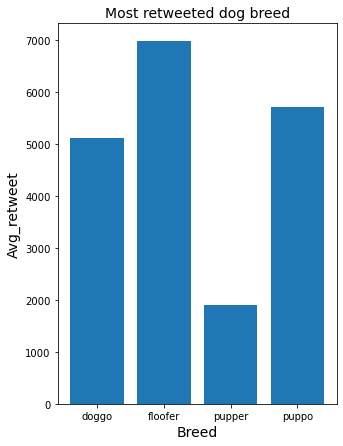

In [65]:

breed_mean_ret={'doog_breed':['doggo','floofer','pupper','puppo'],
     'avg_retweet':[df_clean.query('breed=="doggo"').retweet_count.mean(),
                    df_clean.query('breed=="floofer"').retweet_count.mean(),
                    df_clean.query('breed=="pupper"').retweet_count.mean(),
                    df_clean.query('breed=="puppo"').retweet_count.mean()]}
                    
breed_mean_ret=pd.DataFrame(breed_mean_ret)


plt.subplots(figsize=(5,7))
plt.title('Most retweeted dog breed',fontsize=14)
plt.xlabel('Breed',fontsize=14)
plt.ylabel('Avg_retweet',fontsize=14)
plt.bar(breed_mean_ret['doog_breed'],breed_mean_ret['avg_retweet']);

The above graph shows that floofer breed is the most breeds that get a retweet, it gets around 7000 retweets per tweet, after that puppo and doggo breeds respectively and lastly the pupper breed.

### Question2: Which source is the most used in our dataset ?


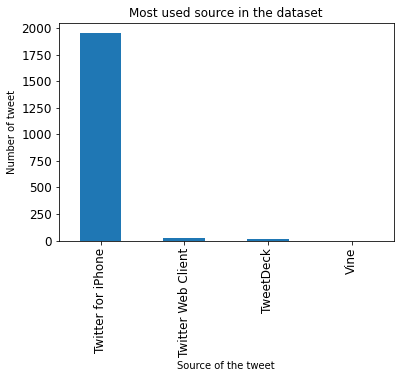

In [66]:
source_values=df_clean.source.value_counts()

plt.xlabel('Source of the tweet')
plt.ylabel('Number of tweet')
plt.title('Most used source in the dataset')
source_values.plot(kind='bar',fontsize=12);

It seems that Twitter for iPhone is the most used source in our dataset tweets with a huge gap between it and other sources as shown in the graph. And it is remarkable to note that Vine source has never been used.

### Question3: What is the most common dog name ?


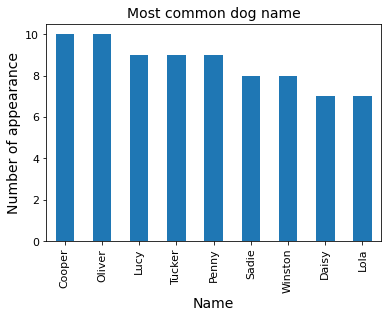

In [68]:
most_common_names=df_clean.name.value_counts()[1:10]

plt.xlabel('Name',fontsize=14)
plt.ylabel('Number of appearance',fontsize=14)
plt.title('Most common dog name',fontsize=14)

most_common_names.plot(kind='bar',fontsize=11);

Cooper and Oliver are the most common names in our dataset, after that, we can see names like Lucy, Penny and Tucker. There is no big difference in the appearance of each name and they are all appeared more than 5 times in the data.